In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 50 # batch size
version = 1

In [5]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 117.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 125.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
from fastai import *
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
%cd /content/drive/My Drive/Nut Recognizer 2

/content/drive/My Drive/Nut Recognizer 2


In [9]:
nut_labels = [
    "raw Almonds",
    "raw Walnuts",
    "raw Cashew nut",
    "raw Pecans",
    "raw Peanut",
    "raw Pili nut",
    "raw Pistachios nut",
    "raw Hazelnuts",
    "raw Brazil nut",
    "raw Maccademia nut",
    "raw Pine nut",
    "raw Chestnut",
    "raw Hickory nut",
    "raw Ginkgo nut"
]
len(nut_labels)

14

In [7]:
images = search_images_ddg(nut_labels[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 200 -- One Image URL => https://sunburstsnacks.co.uk/sunwp20/wp-content/uploads/2020/08/Raw-Almonds-e1624975240518-600x537.jpg'

In [7]:
doc(download_url)

In [8]:
dest = "Almonds-3.jpg"
download_url(images[0], dest, show_progress=False)

Path('Almonds-3.jpg')

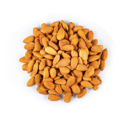

In [9]:
image = Image.open(dest)
image.to_thumb(128, 128)

In [10]:
data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for nut_type in nut_labels:

  dest = f"{data_path}/{nut_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

 # try:
  #  nut_image_urls = search_images_ddg(nut_type)
  #  download_images(dest, urls = nut_image_urls)

#  except:
 #   continue

In [11]:
image_counts = get_image_files(data_path)
image_counts

(#8043) [Path('data/raw Almonds/7b52ed60-478e-43e3-9871-b0caf5f648dd.JPG'),Path('data/raw Almonds/6962ff96-1d7b-4f21-bb89-ef9ff83cf4b5.jpg'),Path('data/raw Almonds/d3dccb83-3664-4854-80bf-5285b107baea.png'),Path('data/raw Almonds/32217a38-3c83-4537-9ab9-5ea733fc7a50.jpg'),Path('data/raw Almonds/b9019723-7276-4e42-8a20-2158c7c964b0.jpg'),Path('data/raw Almonds/7cd4aecc-ee0c-4e0b-aa46-6339c845b64f.jpg'),Path('data/raw Almonds/48b2c783-e88e-4aa0-852a-05523ed180fe.jpg'),Path('data/raw Almonds/f77a28d3-7f1d-49c2-9a15-f97fa1f70fed.jpg'),Path('data/raw Almonds/1e90eb18-7f1e-4b87-a117-cac9e04ec42c.jpg'),Path('data/raw Almonds/d48ab5ae-cdad-4b0d-b0ba-0b654cadd661.jpg')...]

In [12]:
failed = verify_images(image_counts)
failed

(#166) [Path('data/raw Almonds/ec783ea0-0a62-4c6d-8675-7ac1760eb6d6.jpg'),Path('data/raw Almonds/cabab139-ba0e-4a60-a357-8eff834e1efc.jpg'),Path('data/raw Almonds/04685ed7-f8f0-429f-a278-1063ae2e5589.jpg'),Path('data/raw Almonds/229f7778-f145-4efd-a517-6fe59d342f4a.jpeg'),Path('data/raw Almonds/238c5944-793d-4fdb-8755-e7483565014f.jpg'),Path('data/raw Walnuts/0593ea16-c472-4297-a049-e18105cc998b.jpg'),Path('data/raw Walnuts/1c9106f2-18ad-40ae-b560-196e6ad44959.jpg'),Path('data/raw Walnuts/e52f76f1-6ed2-49ca-b517-e8b0738267d7.jpg'),Path('data/raw Walnuts/ffa1a953-1ed6-464c-893b-9ec58a0089c1.jpg'),Path('data/raw Walnuts/a5877018-fbe2-4a2e-8e5e-1dedf84449e9.jpg')...]

In [13]:
failed.map(Path.unlink)

(#166) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
doc(get_image_files)

In [14]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(224))

In [18]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs = bs)
torch.save(dls, f"dataloaders/nut_dataloader_v{version}.pkl")

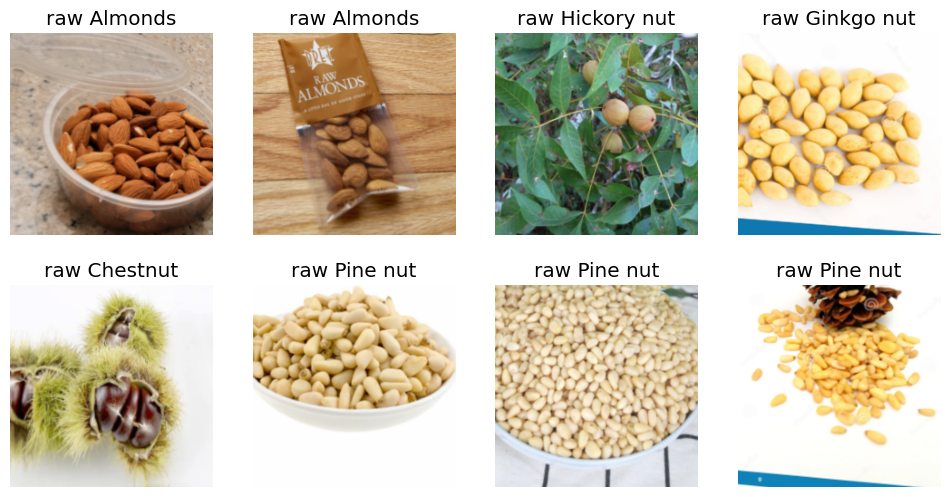

In [19]:
dls.train.show_batch(max_n=8, nrows=2)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


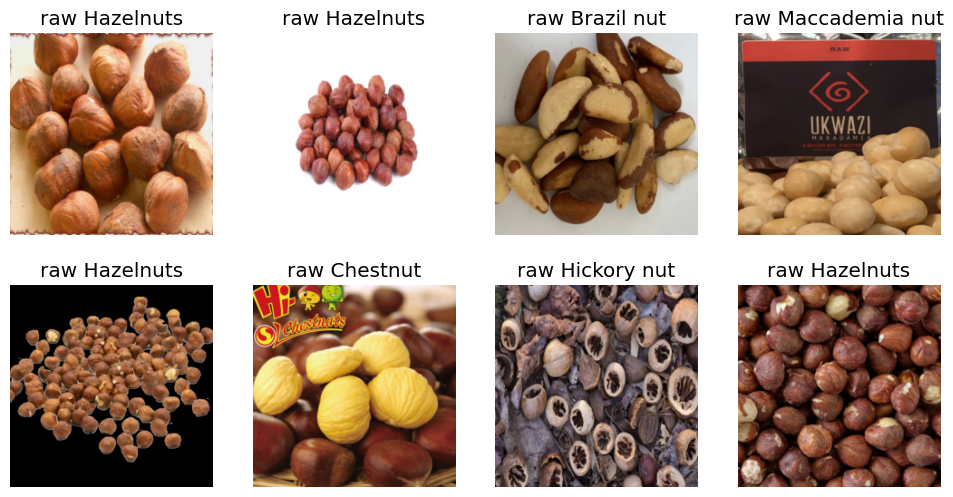

In [20]:
dls.valid.show_batch(max_n=8, nrows=2)

In [ ]:
doc(aug_transforms)

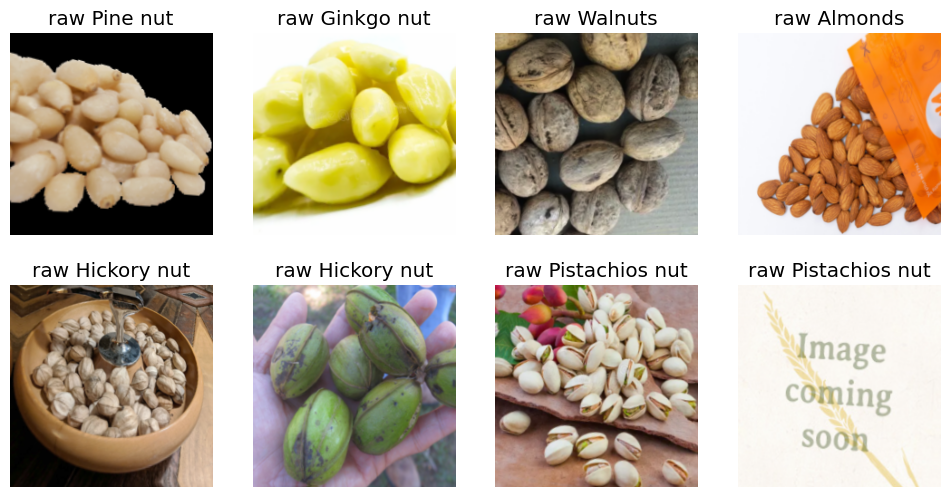

In [21]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [22]:
model_path = "models"

In [23]:
model = vision_learner(dls, resnet50, metrics=[error_rate,accuracy])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 285MB/s]


In [ ]:
 model.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.451188,0.691086,0.212198,0.787802,04:14


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.631490,0.353284,0.108005,0.891995,04:14
1,0.420702,0.254016,0.072427,0.927573,04:16
2,0.260690,0.136856,0.040661,0.959339,04:12
3,0.125567,0.091423,0.029225,0.970775,04:15


In [ ]:
model.save(f"nut-recognizer-v{version}")

Path('models/nut-recognizer-v4.pth')

In [ ]:
 model.load(f"nut-recognizer-v{version}")

NameError: ignored

In [ ]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

FileNotFoundError: ignored

In [ ]:
interp.plot_top_losses(12, nrows=6)

epoch,train_loss,valid_loss,error_rate,accuracy,time


FileNotFoundError: ignored

In [ ]:
cleaner = ImageClassifierCleaner(model)
cleaner # macadamia, pine nut, pecans, pistachios

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f8d688527a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f8d688527a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1478, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1461, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

FileNotFoundError: ignored

In [ ]:
 model.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time


FileNotFoundError: ignored

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}") # change the directory

In [ ]:
model.save(f"nut-recognizer-v{version}")

Path('models/nut-recognizer-v4.pth')

In [ ]:
model.export(f"{model_path}/nut-recognizer-v{version}.pkl")

In [ ]:
 model.load(f"nut-recognizer-v{version}")

NameError: ignored

In [ ]:
  model.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time


FileNotFoundError: ignored